## Pritish karmakar (21ms179)

In [158]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
from scipy.optimize import curve_fit

# Q1

In [220]:
def c_RK4(f, g, t_in, t_f, h, y_0, p_0):
    T = np.arange(t_in,t_f+h,h)
    
    Y = np.zeros(len(T))
    P = np.zeros(len(T))
    
    Y[0] = y_0
    P[0] = p_0
    
    for i in range(1,len(T)):
        t = T[i-1]
        y = Y[i-1]
        p = P[i-1]
        
        k1y = h*f(t,y,p)
        k1p = h*g(t,y,p)
        
        k2y = h*f(t+h/2,y+k1y/2,p+k1p/2)
        k2p = h*g(t+h/2,y+k1y/2,p+k1p/2)
        
        k3y = h*f(t+h/2,y+k2y/2,p+k2p/2)
        k3p = h*g(t+h/2,y+k2y/2,p+k2p/2)
        
        k4y = h*f(t+h/2,y+k3y,p+k3p)
        k4p = h*g(t+h/2,y+k3y,p+k3p)
        
        Y[i] = Y[i-1] + (k1y + 2*k2y + 2*k3y + k4y)/6
        P[i] = P[i-1] + (k1p + 2*k2p + 2*k3p + k4p)/6
        
    return Y

def c_verlet(f, t_in, t_f, h, y_0, p_0):
    T = np.arange(t_in,t_f+h,h)
    Y = np.zeros(len(T))
    Y[0] = y_0
    Y[1] = y_0 + p_0*h + (1/2)*f(y_0)*h**2    
    for i in range(2,len(T)):
        Y[i]= 2*Y[i-1] - Y[i-2] + f(Y[i-1])*h**2
        
    return Y

def c_vel_verlet(f, t_in, t_f, h, y_0, p_0):
    
    T = np.arange(t_in,t_f+h,h)
    Y = np.zeros(len(T))
    P = np.zeros(len(T))
    
    Y[0] = y_0
    P[0] = p_0
    
    for i in range(1,len(T)):
        Y[i]= Y[i-1] + P[i-1]*h + (1/2)*f(Y[i-1])*h**2
        P[i]= P[i-1] + (1/2)*h*(f(Y[i-1]) + f(Y[i]))
        
    return Y

RK4 method:    x(t=15)= 0.99999936
Verlet method: x(t=15)= 0.99987972
Velocity Verlet method: x(t=15)= 0.99987972


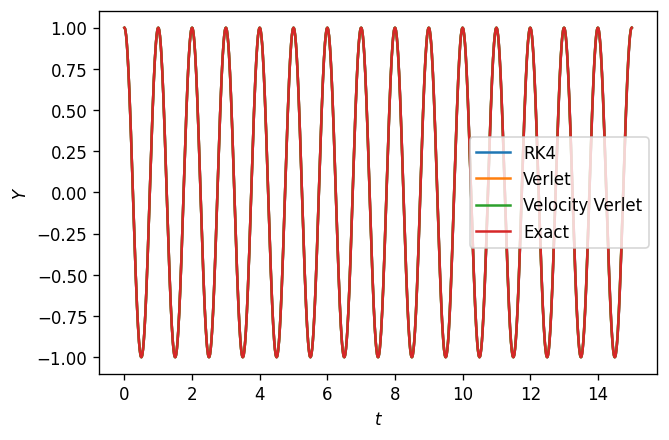

In [231]:
f = lambda t,y,p: p
g = lambda t,y,p: -4*y*np.pi**2
g1 = lambda y: -4*y*np.pi**2

t_in = 0
t_f = 15
y_0 = 1
p_0 = 0
h = 10**(-2)

# exact sol
y1 = lambda t: np.cos(2*np.pi*t)

Y1 = c_RK4(f,g, t_in, t_f, h, y_0, p_0)
Y2 = c_verlet(g1, t_in, t_f, h, y_0, p_0)
Y3 = c_vel_verlet(g1, t_in, t_f, h, y_0, p_0)

T = np.arange(t_in,t_f+h,h)
Y4 = y1(T)

print("RK4 method:    x(t=15)=",round(Y1[-1],8))
print("Verlet method: x(t=15)=",round(Y2[-1],8))
print("Velocity Verlet method: x(t=15)=",round(Y3[-1],8))


plt.plot(T,Y1,label='RK4')
plt.plot(T,Y2,label='Verlet')
plt.plot(T,Y3,label='Velocity Verlet')

plt.plot(T,Y4,label='Exact')

plt.legend()
plt.ylabel('$Y$')
plt.xlabel('$t$')
plt.show()

In [234]:
#b
N = np.arange(-4,-2+0.2,0.2)
H = [10**n for n in N]

Y1_end = [c_RK4(f, g, t_in, t_f, h, y_0, p_0)[-1]  for h in H]
Y2_end = [c_verlet(g1, t_in, t_f, h, y_0, p_0)[-1]  for h in H]
Y3_end = [c_vel_verlet(g1, t_in, t_f, h, y_0, p_0)[-1]  for h in H]


print("n\t RK4_error\t verlet_error \t vel_verlet_error\n")

for i in range(len(H)):
    h=H[i]
    T = np.arange(t_in,t_f+h,h)
    exact1 = y1(T)[-1]
    print("%0.1f\t %0.8f\t %0.8f\t %0.8f"
          %(N[i],abs(Y1_end[i]-exact1),
            abs(Y2_end[i]-exact1),
           abs(Y3_end[i]-exact1)))

n	 RK4_error	 verlet_error 	 vel_verlet_error

-4.0	 0.00000000	 0.00000000	 0.00000000
-3.8	 0.00000000	 0.00000000	 0.00000000
-3.6	 0.00000000	 0.00000001	 0.00000001
-3.4	 0.00000000	 0.00000004	 0.00000004
-3.2	 0.00000000	 0.00000015	 0.00000015
-3.0	 0.00000000	 0.00000001	 0.00000001
-2.8	 0.00000000	 0.00000256	 0.00000256
-2.6	 0.00000000	 0.00000654	 0.00000654
-2.4	 0.00000001	 0.00001349	 0.00001349
-2.2	 0.00000001	 0.00018065	 0.00018065
-2.0	 0.00000064	 0.00012028	 0.00012028


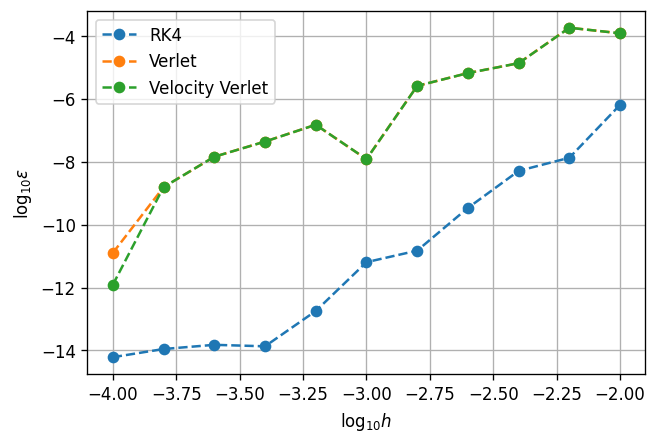

In [238]:
exact1=[]
for i in range(len(H)):
    h=H[i]
    T = np.arange(t_in,t_f+h,h)
    exact1.append(y1(T)[-1])

exact1=np.array(exact1)

RK4_error = np.abs(Y1_end-exact1)
v_error = np.abs(Y2_end-exact1)
vv_error = np.abs(Y3_end-exact1)

RK4_log_error = np.log10(RK4_error)
v_log_error = np.log10(v_error)
vv_log_error = np.log10(vv_error)

plt.plot(N, RK4_log_error, '--o', label='RK4')
plt.plot(N, v_log_error, '--o', label='Verlet')
plt.plot(N, vv_log_error, '--o', label='Velocity Verlet')

plt.legend()
plt.ylabel('$\log_{10} \epsilon$')
plt.xlabel('$\log_{10} h$')
plt.grid(True)

plt.show()

In [239]:
# fitting
def linear_fit(x_data,y_data, init_guess ):
    linear = lambda x,m,c: m*x +c
    param, covar = curve_fit(linear, x_data, y_data, p0=(init_guess[0],init_guess[1]))
    return param

In [240]:
init_guess = (0,0)
x_data =  N

print("slope for RK4    : %0.8f"
      %linear_fit(x_data, RK4_log_error, init_guess)[0])
print("slope for Verlet : %0.8f"
      %linear_fit(x_data, v_log_error, init_guess)[0])
print("slope for Velocity Verlet : %0.8f"
      %linear_fit(x_data, vv_log_error, init_guess)[0])

slope for RK4    : 4.16924128
slope for Verlet : 3.16726641
slope for Velocity Verlet : 3.39712284


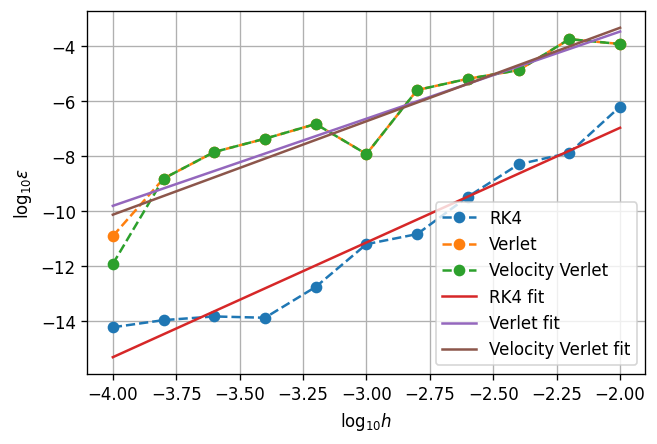

In [242]:
plt.plot(N, RK4_log_error, '--o', label='RK4')
plt.plot(N, v_log_error, '--o', label='Verlet')
plt.plot(N, vv_log_error, '--o', label='Velocity Verlet')

t=np.linspace(-4,-2,2000)
y1=linear_fit(x_data, RK4_log_error, init_guess)[0]*t+linear_fit(x_data, RK4_log_error, init_guess)[1]

y2=linear_fit(x_data, v_log_error, init_guess)[0]*t+linear_fit(x_data, v_log_error, init_guess)[1]

y3=linear_fit(x_data, vv_log_error, init_guess)[0]*t+linear_fit(x_data, vv_log_error, init_guess)[1]


plt.plot(t,y1,label='RK4 fit')
plt.plot(t,y2,label='Verlet fit')
plt.plot(t,y3,label='Velocity Verlet fit')


plt.legend()
plt.ylabel('$\log_{10} \epsilon$')
plt.xlabel('$\log_{10} h$')
plt.grid(True)

plt.show()

# Q2

$$
\left[\begin{array}{c}{\ddot{x}}\\{\ddot{y}}\end{array}\right]
=-\frac{\gamma}{m}
\left[\begin{array}{c}\dot{x}\\\dot{y} \end{array}\right]
+ \left[\begin{array}{c}0\\-g \end{array}\right]
$$

$$\left[\begin{array}{c}{\ddot{x}}\\{\ddot{y}}\end{array}\right]
=-\left[\begin{array}{c}\dot{x}\\\dot{y} \end{array}\right]
- \left[\begin{array}{c}0\\9.81 \end{array}\right]
$$


$$
\dot{x} = v = f(t,x,v)\\
\dot{v} = -v = g(t,x,v)\\
\dot{y} = u = p(t,y,u) \\
\dot{u} = -9.8067  -u = q(t,y,u)
$$

In [195]:
def cup_RK4(f, g, p, q, t_in, h, x_0, v_0, y_0, u_0, y_lim):
    T = [t_in]
    
    X = [x_0]
    V = [v_0]
    Y = [y_0]
    U = [u_0]
    
    while Y[-1] >= y_lim:
        t = T[-1]
        x = X[-1]
        v = V[-1]
        y = Y[-1]
        u = U[-1]
        
        k1x = h * f(t, x, v)
        k1v = h * g(t, x, v)
        
        k2x = h * f(t + h/2, x + k1x/2, v + k1v/2)
        k2v = h * g(t + h/2, x + k1x/2, v + k1v/2)
        
        k3x = h * f(t + h/2, x + k2x/2, v + k2v/2)
        k3v = h * g(t + h/2, x + k2x/2, v + k2v/2)
        
        k4x = h * f(t + h/2, x + k3x, v + k3v)
        k4v = h * g(t + h/2, x + k3x, v + k3v)
        
        X.append(x + (k1x + 2*k2x + 2*k3x + k4x)/6)
        V.append(v + (k1v + 2*k2v + 2*k3v + k4v)/6)
        
      
        k1y = h * p(t, y, u)
        k1u = h * q(t, y, u)
        
        k2y = h * p(t + h/2, y + k1y/2, u + k1u/2)
        k2u = h * q(t + h/2, y + k1y/2, u + k1u/2)
        
        k3y = h * p(t + h/2, y + k2y/2, u + k2u/2)
        k3u = h * q(t + h/2, y + k2y/2, u + k2u/2)
        
        k4y = h * p(t + h/2, y + k3y, u + k3u)
        k4u = h * q(t + h/2, y + k3y, u + k3u)
        
        Y.append(y + (k1y + 2*k2y + 2*k3y + k4y)/6)
        U.append(u + (k1u + 2*k2u + 2*k3u + k4u)/6)

        T.append(t + h)
        
    return X, Y


In [196]:

def c_vel_verlet1(t_in, h,  x_0, v_0, y_0, u_0, y_lim):
    
    T = [t_in]
    X = [x_0]
    V = [v_0]  
    Y = [y_0]
    U = [u_0]
    
    while True:
        X.append(X[-1] + V[-1]*h + (1/2)*(-V[-1])*h**2)
        V.append(V[-1]*((2-h)/(2+h)))
        Y.append(Y[-1] + U[-1]*h + (1/2)*(-U[-1]- 9.8067)*h**2)
        U.append(U[-1]*((2-h)/(2+h)) - (2*9.8067*h)/(2+h))
        T.append(T[-1] + h)
        if Y[-1]<y_lim:
            break
    return X,Y

In [197]:
def c_euler(f, g, t_in, h,  x_0, v_0, y_0, u_0, y_lim):
    
    T = [t_in]
    X = [x_0]
    V = [v_0]  
    Y = [y_0]
    U = [u_0]
    
    while True:
        X.append(X[-1] + h*V[-1])
        V.append(V[-1] + h*f(T[-1],X[-1],V[-1]))
        
        Y.append(Y[-1] + h*U[-1])
        U.append(U[-1] + h*g(T[-1],Y[-1],U[-1]))
        
        T.append(T[-1] + h)
        
        if Y[-1]<y_lim:
            break
    return X,Y


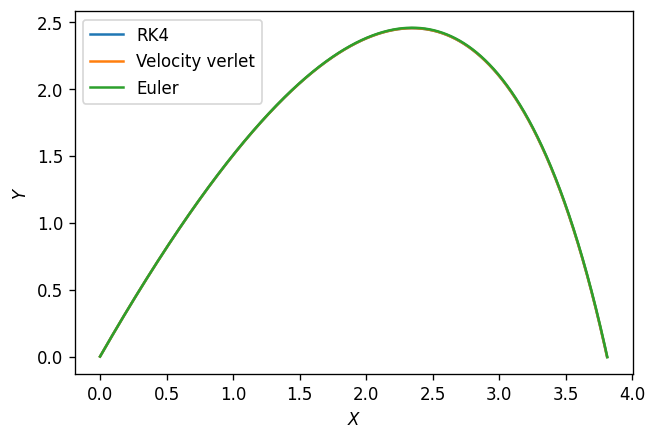

In [198]:
f = lambda t,x,v: v
g = lambda t,x,v: -v

p = lambda t,y,u: u
q = lambda t,y,u: -u - 9.8067 

t_in = 0

x_0 = 0
y_0 = 0
y_lim = 0
v_0 = 10*np.cos(np.pi/3)
u_0 = 10*np.sin(np.pi/3)

h = 0.001

xv1,yv1 = cup_RK4(f, g, p, q, t_in, h, x_0, v_0, y_0, u_0, y_lim)

plt.plot(xv1,yv1,label='RK4')

xv2,yv2 = c_vel_verlet1(t_in, h,  x_0, v_0, y_0, u_0, y_lim)

plt.plot(xv2,yv2,label='Velocity verlet')

xv3,yv3 = c_euler(g, q, t_in, h,  x_0, v_0, y_0, u_0, y_lim)

plt.plot(xv3,yv3,label='Euler')

plt.legend()
plt.ylabel('$Y$')
plt.xlabel('$X$')
plt.show()

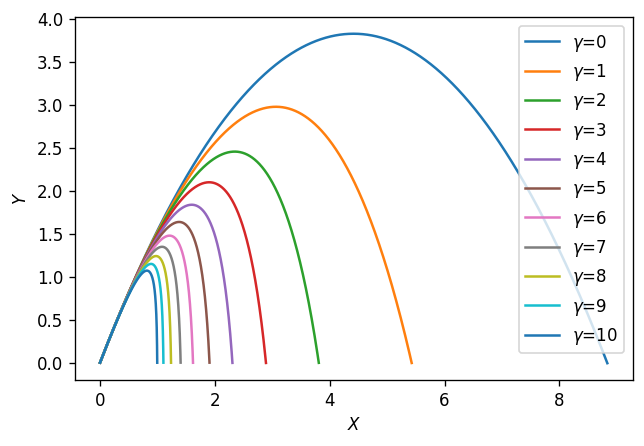

In [199]:
G = np.arange(0,11,1)
m = 2

t_in = 0
x_0 = 0
y_0 = 0
y_lim = 0
v_0 = 10*np.cos(np.pi/3)
u_0 = 10*np.sin(np.pi/3)


for i in range(11):
    f = lambda t,x,v: v
    g = lambda t,x,v: -(G[i]/m)*v

    p = lambda t,y,u: u
    q = lambda t,y,u: -(G[i]/m)*u - 9.8067 

    xv,yv = cup_RK4(f, g, p, q, t_in, h, x_0, v_0, y_0, u_0, y_lim)
    
    plt.plot(xv,yv,label=f'$\gamma$={G[i]}')

plt.legend()
plt.ylabel('$Y$')
plt.xlabel('$X$')
plt.show()
